# Importing Libraries

In [11]:
# Set up imports
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random

# Part-1 : Apply Simulated Annealing 

## 1 - Variable Function

In [42]:
# Function with many minima
def yfunc(x):
    return x**2 + np.sin(8*x)#same example as given by sir

xbase = np.linspace(-2, 2, 10000)
ybase = yfunc(xbase)

Generating some function which has multiple minimas

## General Function:

In [43]:
T = 3 #Initial Temperature
bestcost = 100000 
def gen_func(f , sp , bc , T , dr = 0.95):
    dx = (np.random.random_sample() - 0.5) * T  # generate a random value from xmin to xmax
    x = sp + dx #shift the value of x from starting point randomnly
    y = f(x)
    if y < bc: #check if new value is less than bestcost
        bc = y
        sp = x

    else:
        toss = np.random.random_sample() #generate a point from 0 to 1
        if toss < np.exp(-(y-bc)/T): #If P is high then channge the values
            bc = y
            sp = x
        pass
    T = T * dr #decrease the temperature
    return x , y , sp , bc , T

- In this Code , gen_func() is a function which takes in a function as an argument. It also takes in the starting point , bestcost , Temperature and the decayrate.


- In this function we start off at some initial point . Then , we randomnly move to a different point annd check the value of the function(f) at that point . If it is less than the bestcost which we initialized then , we consider that point as the starting point for our next iteration.  


- If the value is not small then we check for the Probability to move the point by comparing it with a random toss generated .   


- Then for each iteration we change the starting point and also the Temperature as `T = T*(decay_rate)` .  


- Finally after multiple iterations , we get the optimal minima of a particular Function.  


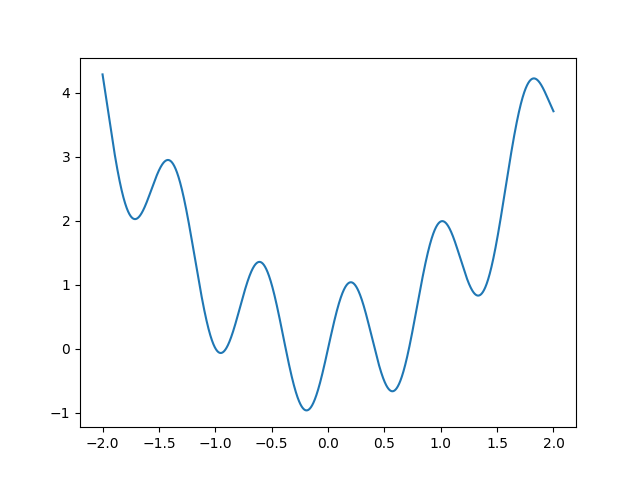

In [44]:
fig1, ax1 = plt.subplots()
ax1.plot(xbase, ybase)
xall, yall = [], []
lnall,  = ax1.plot([], [], 'ro')
lngood, = ax1.plot([], [], 'go', markersize=10)
sp = -1 #starting point

def onestep(frame):
    global sp , bestcost , T #to ensure that after each function call the values change
    x , y , sp , bestcost , T = gen_func(yfunc , sp ,bestcost, T) 
    lngood.set_data(x, y)
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)
    return x , y
ani= FuncAnimation(fig1, onestep, frames=range(100), interval=100, repeat=False)
plt.show()

- As seen from the above graph , we start from a point and then by using FuncAnimation the initial point gets shifted.

- This is done by the variable `frames` which iterates `100` times . For each iteration , the point gets shifted and so the animation of that gets displayed .

- Finally, after `100` iterations the final point reaches the optimal minima of the Function

# Part2 - Travelling Salesman

In [82]:
cities = 0
def readfile(lines):
    global cities
    city_points = []
    for line in lines:
        items = line.strip().split(" ")
        if len(items) == 1:
            cities = int(items[0])
            
        else:
            city_points.append([float(items[0]) , float(items[1])])
    return city_points

textfile = open('tsp_10.txt' , 'r')
city_points = readfile(textfile)
print(cities)
print(city_points)

10
[[3.26, 7.01], [6.77, 3.82], [9.69, 9.97], [7.4, 0.33], [4.53, 1.44], [1.91, 3.67], [0.28, 9.05], [6.36, 3.98], [9.13, 8.86], [5.99, 4.36]]


- We first extract the inputs from the file given to us.
- Then we store the inputs to a variable .
- In this case, the city coordinates are stored in a 2D list named `city_points` and the total number of cities is stored in the variable `cities`.

In [83]:
def distance(city1 , city2):
    x1 , y1 = city1
    x2 , y2 = city2
    return ((x1-x2)**2 + (y1-y2)**2)**0.5

def total_dist(city1):
    sum1 = 0
    city = city1.copy()
    n = len(city)
    for i in range(n-1):
        sum1 += distance(city[i] , city[i+1])
    sum1 += distance(city[0] , city[n-1]) #connecting the start and end points
    return sum1

- In this code all we are doing is taking two cities coordinates and finding the distance between them using the `distance()` function .

- Making use of this function , we find the total distance taken by the salesman to complete his Journey using the `total_dist` function which takes in the coordinates of the cities .


In [84]:
initial_route = [x for x in range(0,cities)]
random.shuffle(initial_route) #generate a random route
city = []
for i in initial_route:
    city.append(city_points[i])
T = 5
bestdist = total_dist(city) #total distance for that given route
print(bestdist)

61.108727770236534


- In this code, we first take some random starting point .
- In this case , the starting point is some route the salesman uses . This is stored in the variable `initial_route`
- Using this route , we find the total distance which is nothing but `bestcost` in this case and is stored in the variable `bestdist`.
- I have initialized the Temperature in this case to `5`.

## Annealing():

In [85]:
def annealing(city , initial_route , bestdist , T , dr = 0.95):
    new_route = initial_route
    index1 = random.randint(0, cities - 1)
    index2 = random.randint(0, cities - 1)
    
    new_route[index1], new_route[index2] = new_route[index2], new_route[index1]
    new_city = []
    for i in new_route:
        new_city.append(city[i])
     
    new_dist = total_dist(new_city)
    if new_dist < bestdist:
        initial_route = new_route
        bestdist = new_dist
        city = new_city
    else:
        toss = np.random.random_sample()
        if toss < np.exp(-(new_dist-bestdist)/T):
            initial_route = new_route
            bestdist = new_dist
            city = new_city
        pass
    T = T*dr
    return city , initial_route , bestdist , T

- This Function takes the city coordinates , initial route , initial distance , Temperature and decay rate as arguments.

- In this Function , we make a new route by swapping the coordinates of two random cities . 

- For this New Route , we find the total distance of that new route .

- We then check the initial distance and the new distance .  If it is less than the initial distance which we initialized then we consider this to be our starting route.  

- If the value is not small then we check for the Probability to still change the route by comparing it with a random toss generated .   

- Finally after multiple iterations , we get the optimal minimum distance needed by the Salesman to travel.  

In [86]:
for i in range(10000):
    city , initial_route , bestdist , T = annealing(city , initial_route ,bestdist , T)
final_route = initial_route
final_city = city
print(f"Minimum distance needed to travel : {bestdist}")
print("The Path needed to achieve this Distance is: ")
print(final_route)

Minimum distance needed to travel : 35.101015845250295
The Path needed to achieve this Distance is: 
[4, 9, 5, 6, 8, 0, 3, 7, 2, 1]


- All this code does is it iterates some `n` times which in this case is `100000` .

- More the number of iterations more close we get to the optimal solution.

- As seen above the minimum distance needed to travel by the salesman is given and the order in which he needs to visit the cities is also given.

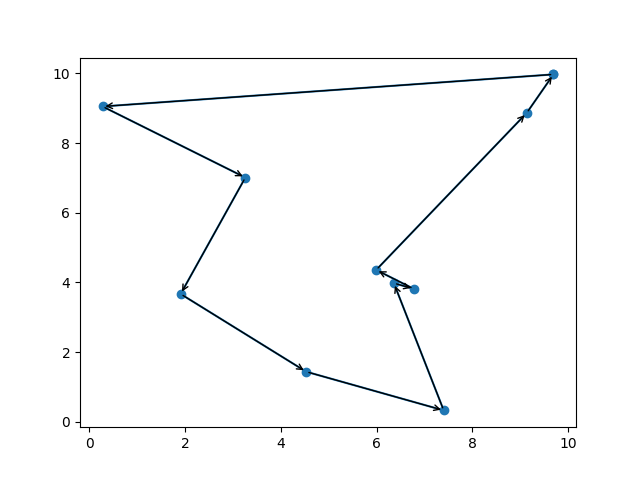

In [87]:
# Example Python input and plot
fig2, ax2 = plt.subplots()
xcities = []
ycities = []
for i in range(cities):
    xcities.append(final_city[i][0])
    ycities.append(final_city[i][1])

xcities = np.array(xcities)
ycities = np.array(ycities)
# Rearrange for plotting
xplot = xcities 
yplot = ycities
xplot = np.append(xplot, xplot[0])
yplot = np.append(yplot, yplot[0])
for i in range(len(xcities)):
    ax2.annotate("", xytext=(xplot[i], yplot[i]), xy=(xplot[i+1], yplot[i+1]), arrowprops=dict(arrowstyle="->"))
ax2.plot(xplot, yplot , 'o-')
plt.show()